In [1]:
import base64
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import yaml

from dateutil import relativedelta

In [2]:
url = "https://docs.google.com/spreadsheets/d/1RblHxOcXIFd2tg4P7cHtZNuElin5ifOHt_0KawkYU7A/export?format=csv&id=1RblHxOcXIFd2tg4P7cHtZNuElin5ifOHt_0KawkYU7A"
df = (pd.read_csv(url).fillna(''))
df

,id,sample_id,sample_link,type,type_of_data,target,sequencing_technique,published_date,publication,publication_link,dataset_link_1,dataset_link_2,beer,country,brewery,beer_id,study_id,Unnamed: 17,Unnamed: 18
0,26,SRR11032273,https://www.ebi.ac.uk/ena/browser/view/SRR1103...,Beer,Amplicon,16S,Illumina,June 2020,Bacterial and Fungal Dynamics During the Ferme...,https://www.frontiersin.org/articles/10.3389/f...,ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR110/073/...,ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR110/073/...,Sesotho,Lesotho,Thaba-Tseka,HN5,PRJNA605088,,
1,26,SRR11032274,https://www.ebi.ac.uk/ena/browser/view/SRR1103...,Beer,Amplicon,16S,Illumina,June 2020,Bacterial and Fungal Dynamics During the Ferme...,https://www.frontiersin.org/articles/10.3389/f...,ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR110/074/...,ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR110/074/...,Sesotho,Lesotho,Thaba-Tseka,HN4,PRJNA605088,,
2,26,SRR11032275,https://www.ebi.ac.uk/ena/browser/view/SRR1103...,Beer,Amplicon,16S,Illumina,June 2020,Bacterial and Fungal Dynamics During the Ferme...,https://www.frontiersin.org/articles/10.3389/f...,ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR110/075/...,ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR110/075/...,Sesotho,Lesotho,Thaba-Tseka,HN3,PRJNA605088,,
3,26,SRR11032276,https://www.ebi.ac.uk/ena/browser/view/SRR1103...,Beer,Amplicon,16S,Illumina,June 2020,Bacterial and Fungal Dynamics During the Ferme...,https://www.frontiersin.org/articles/10.3389/f...,ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR110/076/...,ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR110/076/...,Sesotho,Lesotho,Thaba-Tseka,HN2,PRJNA605088,,
4,26,SRR11032277,https://www.ebi.ac.uk/ena/browser/view/SRR1103...,Beer,Amplicon,16S,Illumina,June 2020,Bacterial and Fungal Dynamics During the Ferme...,https://www.frontiersin.org/articles/10.3389/f...,ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR110/077/...,ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR110/077/...,Sesotho,Lesotho,Thaba-Tseka,HN1,PRJNA605088,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,4,mgm4545648.3,MG-RAST archive,Beer,Amplicon,16S,Illumina,Jul 2014,Local domestication of lactic acid bacteria vi...,https://peerj.com/articles/479/,,,,,,,,,
764,4,mgm4545649.3,MG-RAST archive,Beer,Amplicon,16S,Illumina,Jul 2014,Local domestication of lactic acid bacteria vi...,https://peerj.com/articles/479/,,,,,,,,,
765,4,mgm4545650.3,MG-RAST archive,Beer,Amplicon,16S,Illumina,Jul 2014,Local domestication of lactic acid bacteria vi...,https://peerj.com/articles/479/,,,,,,,,,
766,4,mgm4545651.3,MG-RAST archive,Beer,Amplicon,16S,Illumina,Jul 2014,Local domestication of lactic acid bacteria vi...,https://peerj.com/articles/479/,,,,,,,,,


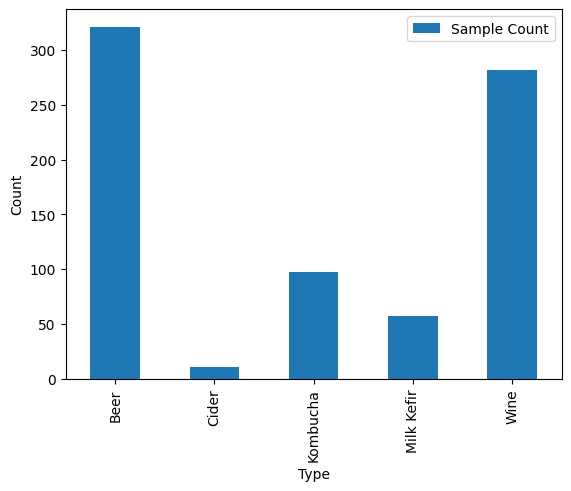

In [10]:
df_sample_count = df.groupby(['type'])['type'].count()

df_sample_count.plot(kind='bar')
plt.xlabel('Type')  # Set x-axis label
plt.ylabel('Count')  # Set y-axis label
# plt.title('Sample Count by Type')  # Set title
plt.legend(['Sample Count'])  # Set legend
plt.savefig('data_composition_by_type.png')
plt.show()

type_of_data  Amplicon  Shotgun
type                           
Beer             317.0      4.0
Cider             11.0      NaN
Kombucha          56.0     41.0
Milk Kefir        37.0     20.0
Wine             262.0     20.0


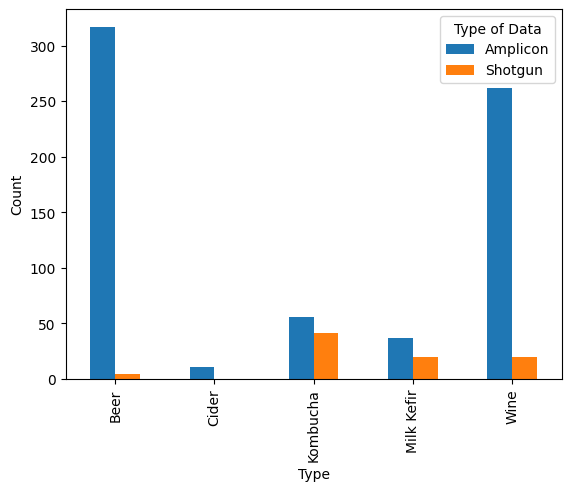

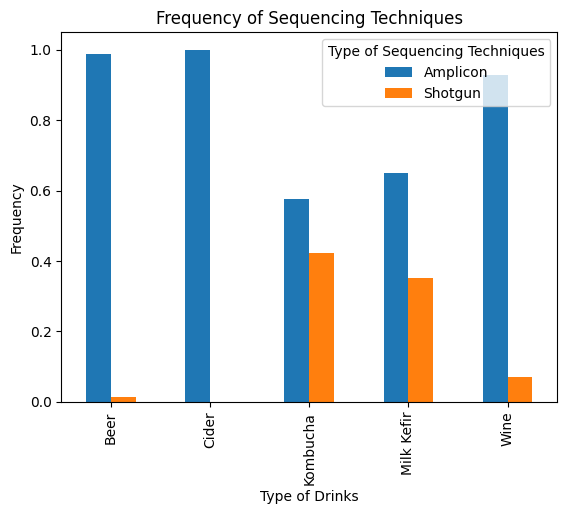

In [9]:

df_techniques = df.groupby(['type', 'type_of_data'])['id'].count().unstack('type_of_data')
print(df_techniques)

df_techniques.plot.bar()
plt.xlabel('Type')  # Set x-axis label
plt.ylabel('Count')  # Set y-axis label
# plt.title('Techniques by Type and Data')  # Set title
plt.legend(title='Type of Data')  # Set legend with title
plt.savefig('data_composition_by_sequencing_techniques.png')
plt.show()

df_techniques_freq = df_techniques.divide(df_techniques.sum(axis=1), axis=0)

df_techniques_freq.plot(kind="bar")
plt.xlabel('Type of Drinks')  # Set x-axis label
plt.ylabel('Frequency')  # Set y-axis label
plt.title('Frequency of Sequencing Techniques')  # Set title
plt.legend(title='Type of Sequencing Techniques')  # Set legend with title
plt.show()

target        16S  26S  28S    ITS
type                              
Beer        119.0  NaN  NaN  198.0
Cider         6.0  NaN  NaN    5.0
Kombucha     28.0  NaN  NaN   28.0
Milk Kefir   20.0  NaN  2.0   15.0
Wine        117.0  6.0  NaN  139.0


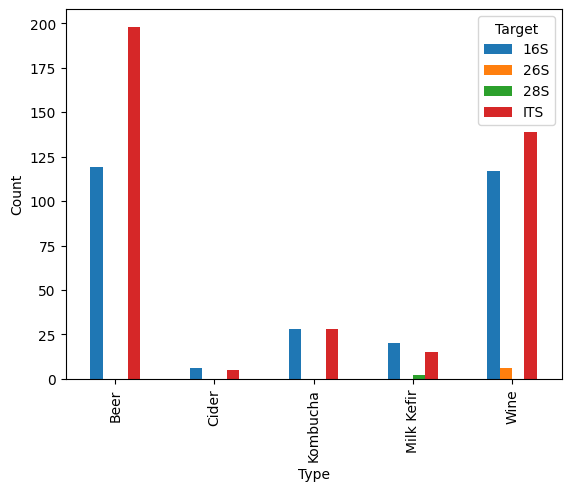

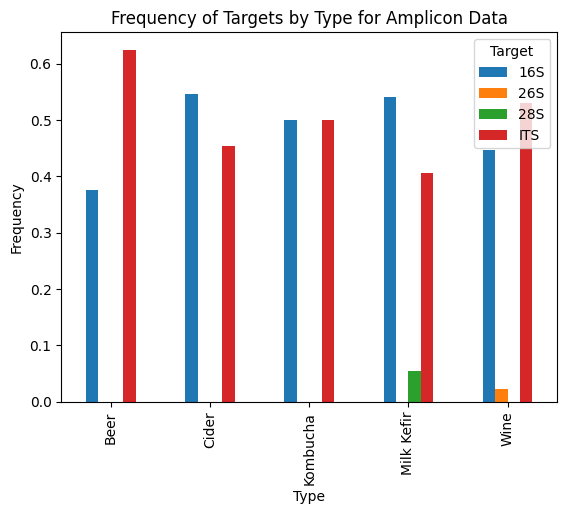

In [8]:
# Filtering and grouping the data
df_amplicon = df[df.type_of_data == 'Amplicon']
df_target = df_amplicon.groupby(['type', 'target'])['id'].count().unstack('target')
print(df_target)

# Plotting the grouped data
df_target.plot.bar()
plt.xlabel('Type')  # Set x-axis label
plt.ylabel('Count')  # Set y-axis label
# plt.title('Count by Target Types for Amplicon Data')  # Set title
plt.legend(title='Target')  # Set legend with title
plt.savefig('amplicon_data_composition_by_targets.png')
plt.show()

# Computing the frequency of each target and plotting
df_target_freq = df_target.divide(df_target.sum(axis=1), axis=0)

df_target_freq.plot(kind="bar")
plt.xlabel('Type')  # Set x-axis label
plt.ylabel('Frequency')  # Set y-axis label
plt.title('Frequency of Targets by Type for Amplicon Data')  # Set title
plt.legend(title='Target')  # Set legend with title
plt.show()

In [7]:
df_bac = df[df.publication == 'BeerDeCoded: the open beer metagenome project']
print(len(df_bac))
df_bac_ITS = df_bac[df_bac.target=='ITS']
df_bac_ITS = df_bac_ITS.reset_index()
print(len(df_bac_ITS))
for index, row in df_bac_ITS.iterrows():
    print(f"{row['sample_id']}_{index+1}_L001_R1_001.fastq.gz {row['dataset_link_1']}")
    if row['dataset_link_2']:
        print(f"{row['sample_id']}_{index+1}_L001_R2_001.fastq.gz {row['dataset_link_2']}")

39
39
SRR5740340_1_L001_R1_001.fastq.gz ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR574/000/SRR5740340/SRR5740340_1.fastq.gz
SRR5740340_1_L001_R2_001.fastq.gz ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR574/000/SRR5740340/SRR5740340_2.fastq.gz
SRR5740341_2_L001_R1_001.fastq.gz ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR574/001/SRR5740341/SRR5740341_1.fastq.gz
SRR5740341_2_L001_R2_001.fastq.gz ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR574/001/SRR5740341/SRR5740341_2.fastq.gz
SRR5740342_3_L001_R1_001.fastq.gz ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR574/002/SRR5740342/SRR5740342_1.fastq.gz
SRR5740342_3_L001_R2_001.fastq.gz ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR574/002/SRR5740342/SRR5740342_2.fastq.gz
SRR5740343_4_L001_R1_001.fastq.gz ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR574/003/SRR5740343/SRR5740343_1.fastq.gz
SRR5740343_4_L001_R2_001.fastq.gz ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR574/003/SRR5740343/SRR5740343_2.fastq.gz
SRR5740344_5_L001_R1_001.fastq.gz ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR574/004/SRR5740344

In [8]:
df_bac_16S = df_bac[df_bac.target=='16S']
print(len(df_bac_16S))
df_bac_16S = df_bac_16S.reset_index()
for index, row in df_bac_16S.iterrows():
    print(f"{row['sample_id']}_{index+1}_L001_R1_001.fastq.gz {row['dataset_link_1']}")
    if row['dataset_link_2']:
        print(f"{row['sample_id']}_{index+1}_L001_R2_001.fastq.gz {row['dataset_link_2']}")

0


In [9]:
df_beer = df[df.type == 'Beer']
df_beer = df_beer[df_beer.id != 4]
df_beer.to_json('db.json', orient='records')
print(len(df_beer))

301


In [10]:
import json

with open('db.json') as f:
    db_json = json.load(f)
    print(len(db_json))
    for ob in db_json:
        ob['dataset_links'] = []
        if(ob['dataset_link_1']!=None):
            if(len(ob['dataset_link_1'])!= 0):
                ob['dataset_links'].append(ob['dataset_link_1'])
            del(ob['dataset_link_1'])
        if(ob['dataset_link_2']!=None):
            if(len(ob['dataset_link_2'])!= 0):
                ob['dataset_links'].append(ob['dataset_link_2'])
            del(ob['dataset_link_2'])

with open('db_ready.json', 'w') as f:
    json.dump(db_json, f)

print(db_json)

301
[{'id': 26, 'sample_id': 'SRR11032273', 'sample_link': 'https://www.ebi.ac.uk/ena/browser/view/SRR11032273', 'type': 'Beer', 'type_of_data': 'Amplicon', 'target': '16S', 'sequencing_technique': 'Illumina ', 'published_date': 'June 2020', 'publication': 'Bacterial and Fungal Dynamics During the Fermentation Process of Sesotho, a Traditional Beer of Southern Africa', 'publication_link': 'https://www.frontiersin.org/articles/10.3389/fmicb.2020.01451/full', 'beer': 'Sesotho ', 'country': 'Lesotho', 'brewery': 'Thaba-Tseka', 'beer_id': 'HN5', 'study_id': 'PRJNA605088', 'dataset_links': ['ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR110/073/SRR11032273/SRR11032273_1.fastq.gz', 'ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR110/073/SRR11032273/SRR11032273_2.fastq.gz']}, {'id': 26, 'sample_id': 'SRR11032274', 'sample_link': 'https://www.ebi.ac.uk/ena/browser/view/SRR11032274', 'type': 'Beer', 'type_of_data': 'Amplicon', 'target': '16S', 'sequencing_technique': 'Illumina ', 'published_date': 'June 2020', 

In [ ]:

# Define file paths and names
csv_files = ['data/Doppelbock and Marzen lagers_16S.csv', 'data/Sesotho_16S.csv', './data/Sour Beer 16S.csv']
json_files = []
merged_file = 'merged_data.json'

# Loop through CSV files and convert to JSON
for file in csv_files:
    csv_data = pd.read_csv(file)
    json_data = csv_data.to_json(orient='records')
    json_file = file.split('.')[0] + '.json'
    with open(json_file, 'w') as f:
        f.write(json_data)
    json_files.append(json_file)

# Merge all JSON files together
merged_data = []
for file in json_files:
    with open(file) as f:
        data = json.load(f)
    merged_data += data

# Write merged data to JSON file
with open(merged_file, 'w') as f:
    json.dump(merged_data, f)